# **WhatKey**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Proyecto IA')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA


# **Importar librerias**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
sns.set_theme()

# Clasificando las imagenes

Para esta sección primero se leeran las imagenes con la libreria "CV2", seguido de esto se clasificaran las imagenes en numpy arrays, donde el primer array 'keys' es usado en los clasificadores y el array 'keysT' es usado en la red neuronal.

In [ ]:
keys = np.zeros(shape=(184, 7000))
keysC = np.zeros(shape=(184, 7000))
keysT = np.zeros(shape=(184, 100, 70))
for i in range(184):
  I = cv2.imread(f"keys/datakeys/key ({i+1}).jpg", 0)
  height, width = I.shape[0:2]
  startRow = int(height*.2)
  startCol = int(width*.3)
  endRow = int(height*.8)
  endCol = int(width*.7)
  I = I[startRow:endRow, startCol:endCol]
  I = cv2.resize(I, (70,100))
  M = cv2.fastNlMeansDenoising(I)
  Ic = cv2.Canny(M, 80,130)
  keysT[i] = Ic
  Ic = np.reshape(Ic,(1,7000))
  I = np.reshape(I,(1,7000))
  keys[i] = I 
  keysC[i] = Ic

In [ ]:
print("Array para los clasificadores", keysC.shape)
print("Array para la red neuronal", keysT.shape)

Array para los clasificadores (184, 7000)
Array para la red neuronal (184, 100, 70)


Seguido de esto creamos un array 'label' donde contendra las etiquetas de las llaves. Dicho array lo utilizaremos para la clasificacion de las llaves en el entreno de los clasificadores.

In [ ]:
labels = []
label = 0
for i in range(50):
  labels.append(label)

label += 1
for i in range(48):
  labels.append(label)

label += 1
for i in range(49):
  labels.append(label)

label += 1
for i in range(37):
  labels.append(label)

len(labels)

184

In [ ]:
X = keysC
y = np.array(labels)

Creamos los arrays con un 20% en el test y 80% en el train de os datos completos que utilizaremos en los clasificadores correspondientes para entrenarlos, los cuales seran los siguientes: Naive Gausean Bayes, Super Vector Classifier y Random Forest Classifier

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [ ]:
print( X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape)

(147, 7000) (37, 7000)
(147,) (37,)


# **Clasificadores**

# Naive gaussian bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions_Bayes = NB.predict(X_test)

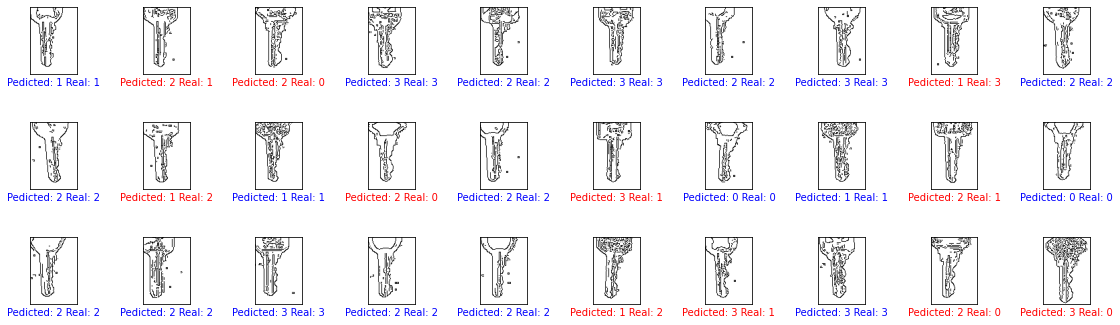

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot_clasificador.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_Bayes, y_test, X_test)

In [ ]:
print( "acierto en train", NB.score(X_train, y_train))
print( "acierto en test ", NB.score(X_test, y_test))

acierto en train 0.9523809523809523
acierto en test  0.6486486486486487


# Super Vector Classifier

In [ ]:
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train, y_train)
predictions_SVC = SVC_poly.predict(X_test)

<Figure size 432x288 with 0 Axes>

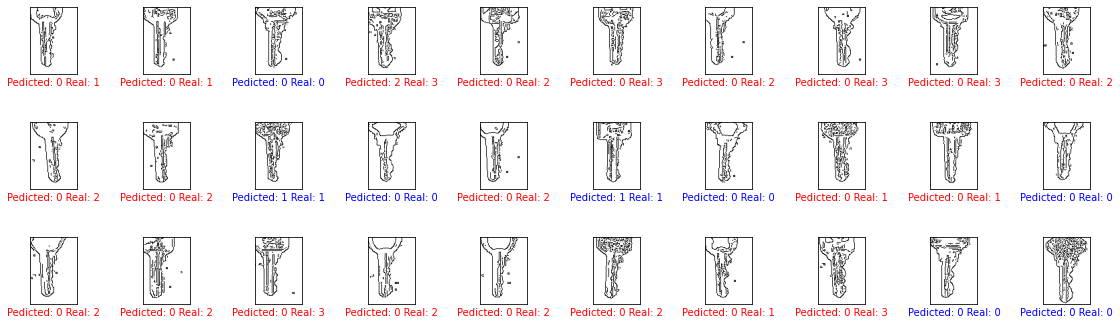

In [ ]:
%run Functions/dl_plot_clasificador.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_SVC, y_test, X_test)

In [ ]:
print( "acierto en train", SVC_poly.score(X_train, y_train))
print( "acierto en test ", SVC_poly.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.2972972972972973


# Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RandomForest = RFC.predict(X_test)

<Figure size 432x288 with 0 Axes>

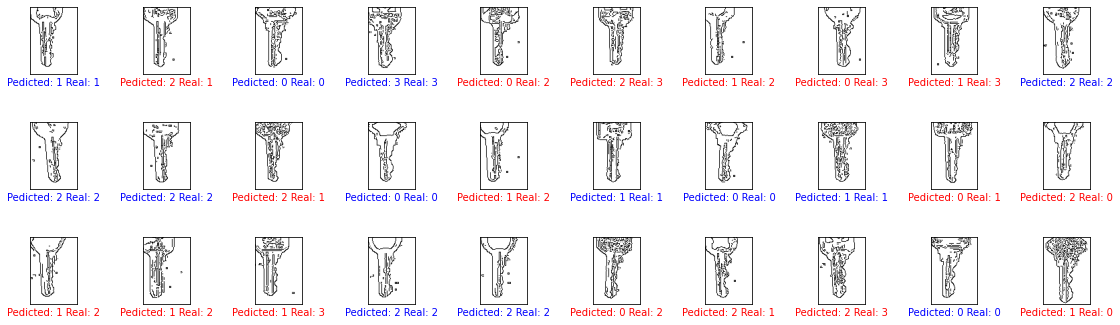

In [ ]:
%run Functions/dl_plot_clasificador.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_RandomForest, y_test, X_test)

In [ ]:
print( "acierto en train", RFC.score(X_train, y_train))
print( "acierto en test ", RFC.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.4594594594594595


# Acierto en todo el array de imagenes por parte de los clasificadores

Naive Gausean Bayes

In [ ]:
s = cross_val_score(GaussianNB(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.647 (+/- 0.06401)


Super Vector Classifier

In [ ]:
s = cross_val_score(SVC(kernel='poly'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.293 (+/- 0.09850)


Random Forest Classifier

In [ ]:
s = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.523 (+/- 0.09328)


# **Deep Learning**

In [ ]:
X = keysT
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(147, 100, 70) (147,) (37, 100, 70) (37,)


In [ ]:
#@title *code* Para normalizar y preparar los datos
X_train = X_train.reshape([-1, 70, 100, 1])
X_test = X_test.reshape([-1, 70, 100, 1])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (147, 70, 100, 1)
Number of images in X_train 147
Number of images in X_test 37


In [ ]:
#@title *code* Creando la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[70, 100, 1]),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(512, activation=tf.nn.tanh),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)  
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 7000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              7169024   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 516       
Total params: 7,858,564
Trainable params: 7,858,564
Non-trainable params: 0
____________________________________________

In [ ]:
#@title *code* Entrenando la red neuronal
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 68ms/step - loss: 1.3985 - accuracy: 0.2596
Epoch 2/10
5/5 [==============================] - 0s 48ms/step - loss: 1.0592 - accuracy: 0.6668
Epoch 3/10
5/5 [==============================] - 0s 49ms/step - loss: 0.7986 - accuracy: 0.8616
Epoch 4/10
5/5 [==============================] - 0s 58ms/step - loss: 0.6434 - accuracy: 0.9595
Epoch 5/10
5/5 [==============================] - 0s 45ms/step - loss: 0.4993 - accuracy: 0.9780
Epoch 6/10
5/5 [==============================] - 0s 46ms/step - loss: 0.3897 - accuracy: 0.9947
Epoch 7/10
5/5 [==============================] - 0s 48ms/step - loss: 0.3240 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 52ms/step - loss: 0.2690 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 44ms/step - loss: 0.2178 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 44ms/step - loss: 0.1860 - accuracy: 1.0000


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 13ms/step - loss: 1.1877 - accuracy: 0.4865
Test accuracy: 0.4864864945411682


In [ ]:
predictions = model.predict(X_test)

<Figure size 432x288 with 0 Axes>

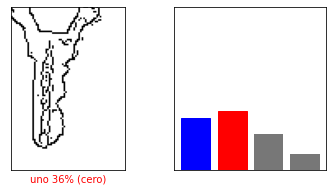

In [ ]:
%run Functions/dl_plot.py
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

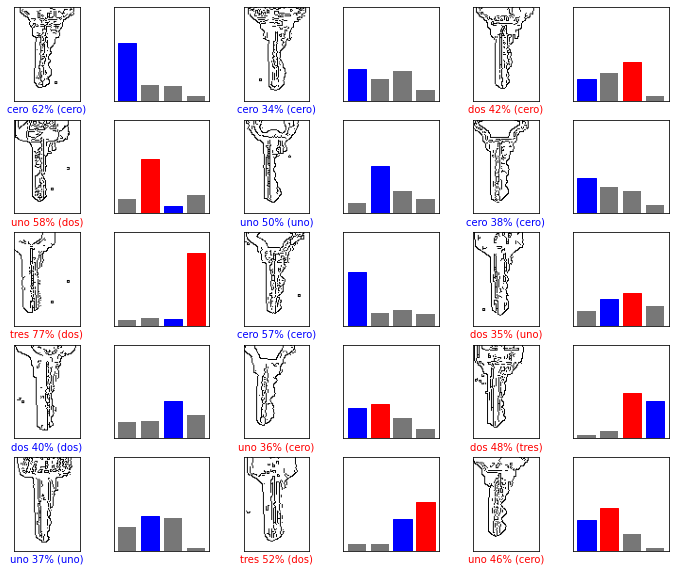

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot.py
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

# **Conclusiones**



*   En este notebook implementamos las imagenes con filtro de bordes en el cual podemos observar un comportamiento muy curioso de los clasificadores, ya que al momento de entrenarlos con las imagenes del train obtienen un 100% de precisión, pero al momento de intentar predecir imagenes del test con los clasificadores entrenados obtienen un rendimiento poco optimo y demasiado pobre a comparación del notebook con imagenes sin bordeado.
*   Tambien podemos notar este comportamiento en la red neuronal, donde se necesitan pocos epochs para poder ser entrenada llegando al 100% de precisión en las imagenes del train, pero tiene un mal rendimiento al momento de predecir referencias en el test.
*   Podemos observar que el metodo que obtiene un mejor acierto al clasificar las imagenes de las llaves completas es el Naive Gaussean Bayes con un 64.86% de precisión en las imagenes del test.
*   Al contrario de lo pensado al implementar esta opcion de bordeado, se puede evidenciar que es una mala opción, ya que a pesar de que en todos los clasificadores se obtiene un 100% de precisión, al momento de predecir imagenes del test se aprecia un pesimo rendimiento, donde el unico clasificador (incluida la red neuronal) que obtiene una precisión mayor del 50% es el de Naive Gaussean Bayes. 


